#1. Importar librerias

In [ ]:
from google.colab import files
import math
#Manejo de datos
import pandas as pd
import numpy as np

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Manejo de fechas
from datetime import datetime

#Opciones de visualización
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

#2.Subir y leer el DataSet

In [ ]:
#Subir archivo
uploaded = files.upload()

#Cargar a DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.head()
df_copy=df.copy()

Saving DataSet_Final.csv to DataSet_Final (2).csv


,Estado,ID_Expediente,Clasificacion_Norma,Fecha_Inicio,Caratula,Estado_Actual,Prioridad_Expediente,Riesgo_Financiero,Abogado_Asignado,Instancia_Actual,Audiencia_Prevista,Resultado_Final,Cantidad_de_Partes,Monto_Reclamado,Monto_Resuelto,Tipo_Demandante,Dias_en_Etapa,Juzgado,Caratula.1,Abogado_Contraparte
0,EN TRÁMITE,476369,Norma Civil,2005-04-07 13:43:36,Expediente 0,FERIA JUDICIAL,Baja,Alto,Belén,Primera Instancia,2027-09-29 22:12:19,Desfavorable,6,1734442.13,1223087.98,Persona Física,1591,COMERCIAL 1,Caso relacionado 0,DR. PAREDES
1,EN TRÁMITE,478544,Norma Penal,2007-05-19 14:45:07,Expediente 1,APELADO,Alta,Bajo,Andres,Segunda Instancia,2030-07-25 16:49:44,Conciliación,2,44841.49,NaN,Persona Física,769,PAZ TERCERA,Caso relacionado 1,DR. URQUIZA
2,APELADO,442962,Norma Comercial,2003-04-15 23:00:51,Expediente 2,FERIA JUDICIAL,NaN,Alto,Belén,Primera Instancia,2028-03-08 12:51:30,Desfavorable,5,2023370.04,520639.63,Persona Física,1125,LABORAL 5,Caso relacionado 2,DR. PAREDES
3,TERMINADO,366847,Norma Civil,2000-09-16 23:10:13,Expediente 3,TERMINADO,Baja,Alto,Andres,Primera Instancia,2029-07-14 15:43:00,Favorable,7,1181424.56,1194948.30,Empresa,1222,PAZ TERCERA,Caso relacionado 3,DR. PAREDES
4,TERMINADO,820488,Norma Laboral,2013-05-05 23:34:01,Expediente 4,TERMINADO,Baja,Bajo,Belén,Corte Suprema,2026-01-30 01:03:51,Desfavorable,4,4096157.66,3121292.11,Empresa,813,COMERCIAL 1,Caso relacionado 4,DR. PAREDES


#3.Info general

In [ ]:
df.shape
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Estado                1550 non-null   object 
 1   ID_Expediente         1550 non-null   int64  
 2   Clasificacion_Norma   1550 non-null   object 
 3   Fecha_Inicio          1550 non-null   object 
 4   Caratula              1550 non-null   object 
 5   Estado_Actual         1550 non-null   object 
 6   Prioridad_Expediente  1515 non-null   object 
 7   Riesgo_Financiero     1550 non-null   object 
 8   Abogado_Asignado      1550 non-null   object 
 9   Instancia_Actual      1550 non-null   object 
 10  Audiencia_Prevista    1498 non-null   object 
 11  Resultado_Final       1550 non-null   object 
 12  Cantidad_de_Partes    1550 non-null   int64  
 13  Monto_Reclamado       1550 non-null   float64
 14  Monto_Resuelto        1503 non-null   float64
 15  Tipo_Demandante      

,Estado,ID_Expediente,Clasificacion_Norma,Fecha_Inicio,Caratula,Estado_Actual,Prioridad_Expediente,Riesgo_Financiero,Abogado_Asignado,Instancia_Actual,Audiencia_Prevista,Resultado_Final,Cantidad_de_Partes,Monto_Reclamado,Monto_Resuelto,Tipo_Demandante,Dias_en_Etapa,Juzgado,Caratula.1,Abogado_Contraparte
count,1550,1550.000000,1550,1550,1550,1550,1515,1550,1550,1550,1498,1550,1550.000000,1.550000e+03,1.503000e+03,1550,1550.000000,1550,1550,1506
unique,4,NaN,4,1499,500,4,3,3,5,3,1450,4,NaN,NaN,NaN,3,NaN,4,500,3
top,TERMINADO,NaN,Norma Penal,2009-12-04 23:34:01,Expediente 276,EN TRÁMITE,Alta,Alto,Agostina,Segunda Instancia,2023-02-04 13:32:07,Conciliación,NaN,NaN,NaN,Empresa,NaN,PAZ TERCERA,Caso relacionado 276,DRA. CINTIA FIAD
freq,395,NaN,398,2,9,432,522,557,341,525,2,423,NaN,NaN,NaN,584,NaN,396,9,543
mean,NaN,549015.098065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.503871,2.527275e+06,1.966447e+06,NaN,1026.121290,NaN,NaN,NaN
std,NaN,261956.840693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.336932,1.522732e+06,1.184571e+06,NaN,576.923866,NaN,NaN,NaN
min,NaN,100249.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.003724e+04,2.970437e+04,NaN,17.000000,NaN,NaN,NaN
25%,NaN,316667.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.207282e+06,9.508728e+05,NaN,529.750000,NaN,NaN,NaN
50%,NaN,548833.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,2.444044e+06,1.888469e+06,NaN,1009.500000,NaN,NaN,NaN
75%,NaN,779854.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,3.741656e+06,2.904580e+06,NaN,1486.750000,NaN,NaN,NaN


#4.Exploracion y tratamiento de nulos y duplicados

In [ ]:
# 4.1 - Exploración inicial del dataset

print("Dimensiones del dataset:")
print(df.shape)  # filas, columnas

print("Tipos de datos:")
print(df.dtypes)

print("Cantidad de valores nulos por columna:")
print(df.isna().sum())

print("Porcentaje de valores nulos por columna:")
print((df.isna().mean() * 100).round(2))

print("Cantidad de filas duplicadas:")
print(df.duplicated().sum())

Dimensiones del dataset:
(1550, 20)
Tipos de datos:
Estado                   object
ID_Expediente             int64
Clasificacion_Norma      object
Fecha_Inicio             object
Caratula                 object
Estado_Actual            object
Prioridad_Expediente     object
Riesgo_Financiero        object
Abogado_Asignado         object
Instancia_Actual         object
Audiencia_Prevista       object
Resultado_Final          object
Cantidad_de_Partes        int64
Monto_Reclamado         float64
Monto_Resuelto          float64
Tipo_Demandante          object
Dias_en_Etapa             int64
Juzgado                  object
Caratula.1               object
Abogado_Contraparte      object
dtype: object
Cantidad de valores nulos por columna:
Estado                   0
ID_Expediente            0
Clasificacion_Norma      0
Fecha_Inicio             0
Caratula                 0
Estado_Actual            0
Prioridad_Expediente    35
Riesgo_Financiero        0
Abogado_Asignado         0
Instancia_Ac

In [ ]:
# 1.PRIORIDAD: imputar con la moda
df['Prioridad_Expediente'].fillna(df['Prioridad_Expediente'].mode()[0], inplace=True)

# 2.AUDIENCIA: crear indicador y dejar nulos
df['Tiene_Audiencia'] = df['Audiencia_Prevista'].notna().astype(int)

# 3.MONTO RESUELTO: imputar con la mediana
df['Monto_Resuelto'].fillna(df['Monto_Resuelto'].median(), inplace=True)

# 4.ABOGADO CONTRAPARTE: completar con ‘DESCONOCIDO’
df['Abogado_Contraparte'].fillna('DESCONOCIDO', inplace=True)


/tmp/ipython-input-710713167.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Prioridad_Expediente'].fillna(df['Prioridad_Expediente'].mode()[0], inplace=True)
/tmp/ipython-input-710713167.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [ ]:
#Contar filas duplicadas completas
duplicados = df.duplicated().sum()
duplicados

np.int64(50)

In [ ]:
#Eliminar duplicados conservando la primera aparición
df = df.drop_duplicates()

#Verificar de nuevo
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(1500, 21)

#5. Conversion de datos

In [ ]:
#Fechas
df["Fecha_Inicio"] = pd.to_datetime(df["Fecha_Inicio"], errors="coerce")
df["Audiencia_Prevista"] = pd.to_datetime(df["Audiencia_Prevista"], errors="coerce")

#Numéricas
cols_int = ["ID_Expediente", "Cantidad_de_Partes", "Dias_en_Etapa"]
cols_float = ["Monto_Reclamado", "Monto_Resuelto"]

for col in cols_int:
    df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")  # entero que permite NaN

for col in cols_float:
    df[col] = pd.to_numeric(df[col], errors="coerce")

#Categóricas
cols_cat = [
    "Estado", "Clasificacion_Norma", "Caratula", "Estado_Actual",
    "Prioridad_Expediente", "Riesgo_Financiero", "Abogado_Asignado",
    "Instancia_Actual", "Resultado_Final", "Tipo_Demandante",
    "Juzgado", "Caratula.1", "Abogado_Contraparte"
]

for col in cols_cat:
    df[col] = df[col].astype("category")

In [ ]:
df.dtypes

,0
Estado,category
ID_Expediente,Int64
Clasificacion_Norma,category
Fecha_Inicio,datetime64[ns]
Caratula,category
Estado_Actual,category
Prioridad_Expediente,category
Riesgo_Financiero,category
Abogado_Asignado,category
Instancia_Actual,category


#6.Graficos

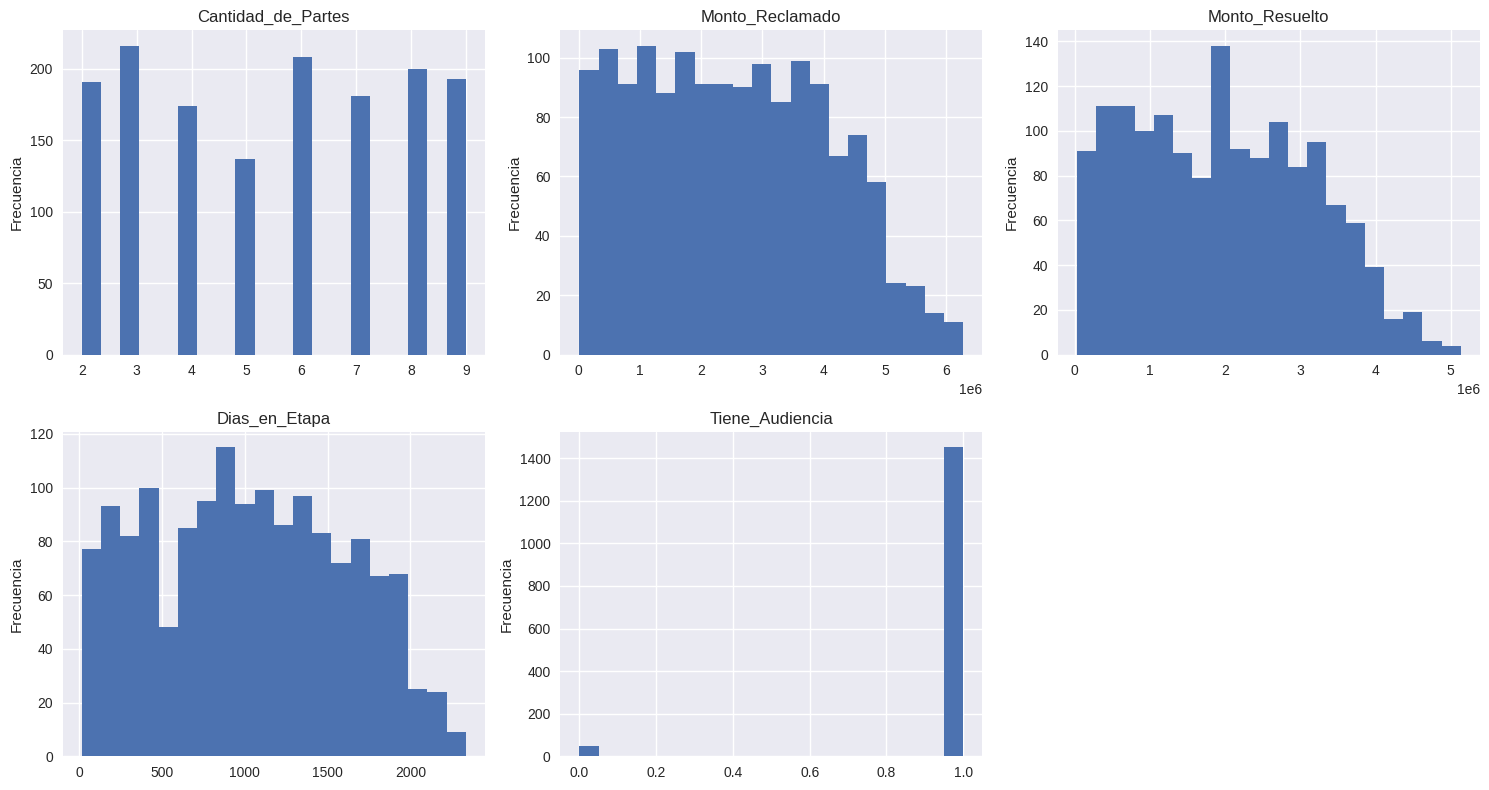

In [ ]:
numeric_cols = [
    'Cantidad_de_Partes',
    'Monto_Reclamado',
    'Monto_Resuelto',
    'Dias_en_Etapa',
    'Tiene_Audiencia'
]

n = len(numeric_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=20)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

# borrar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


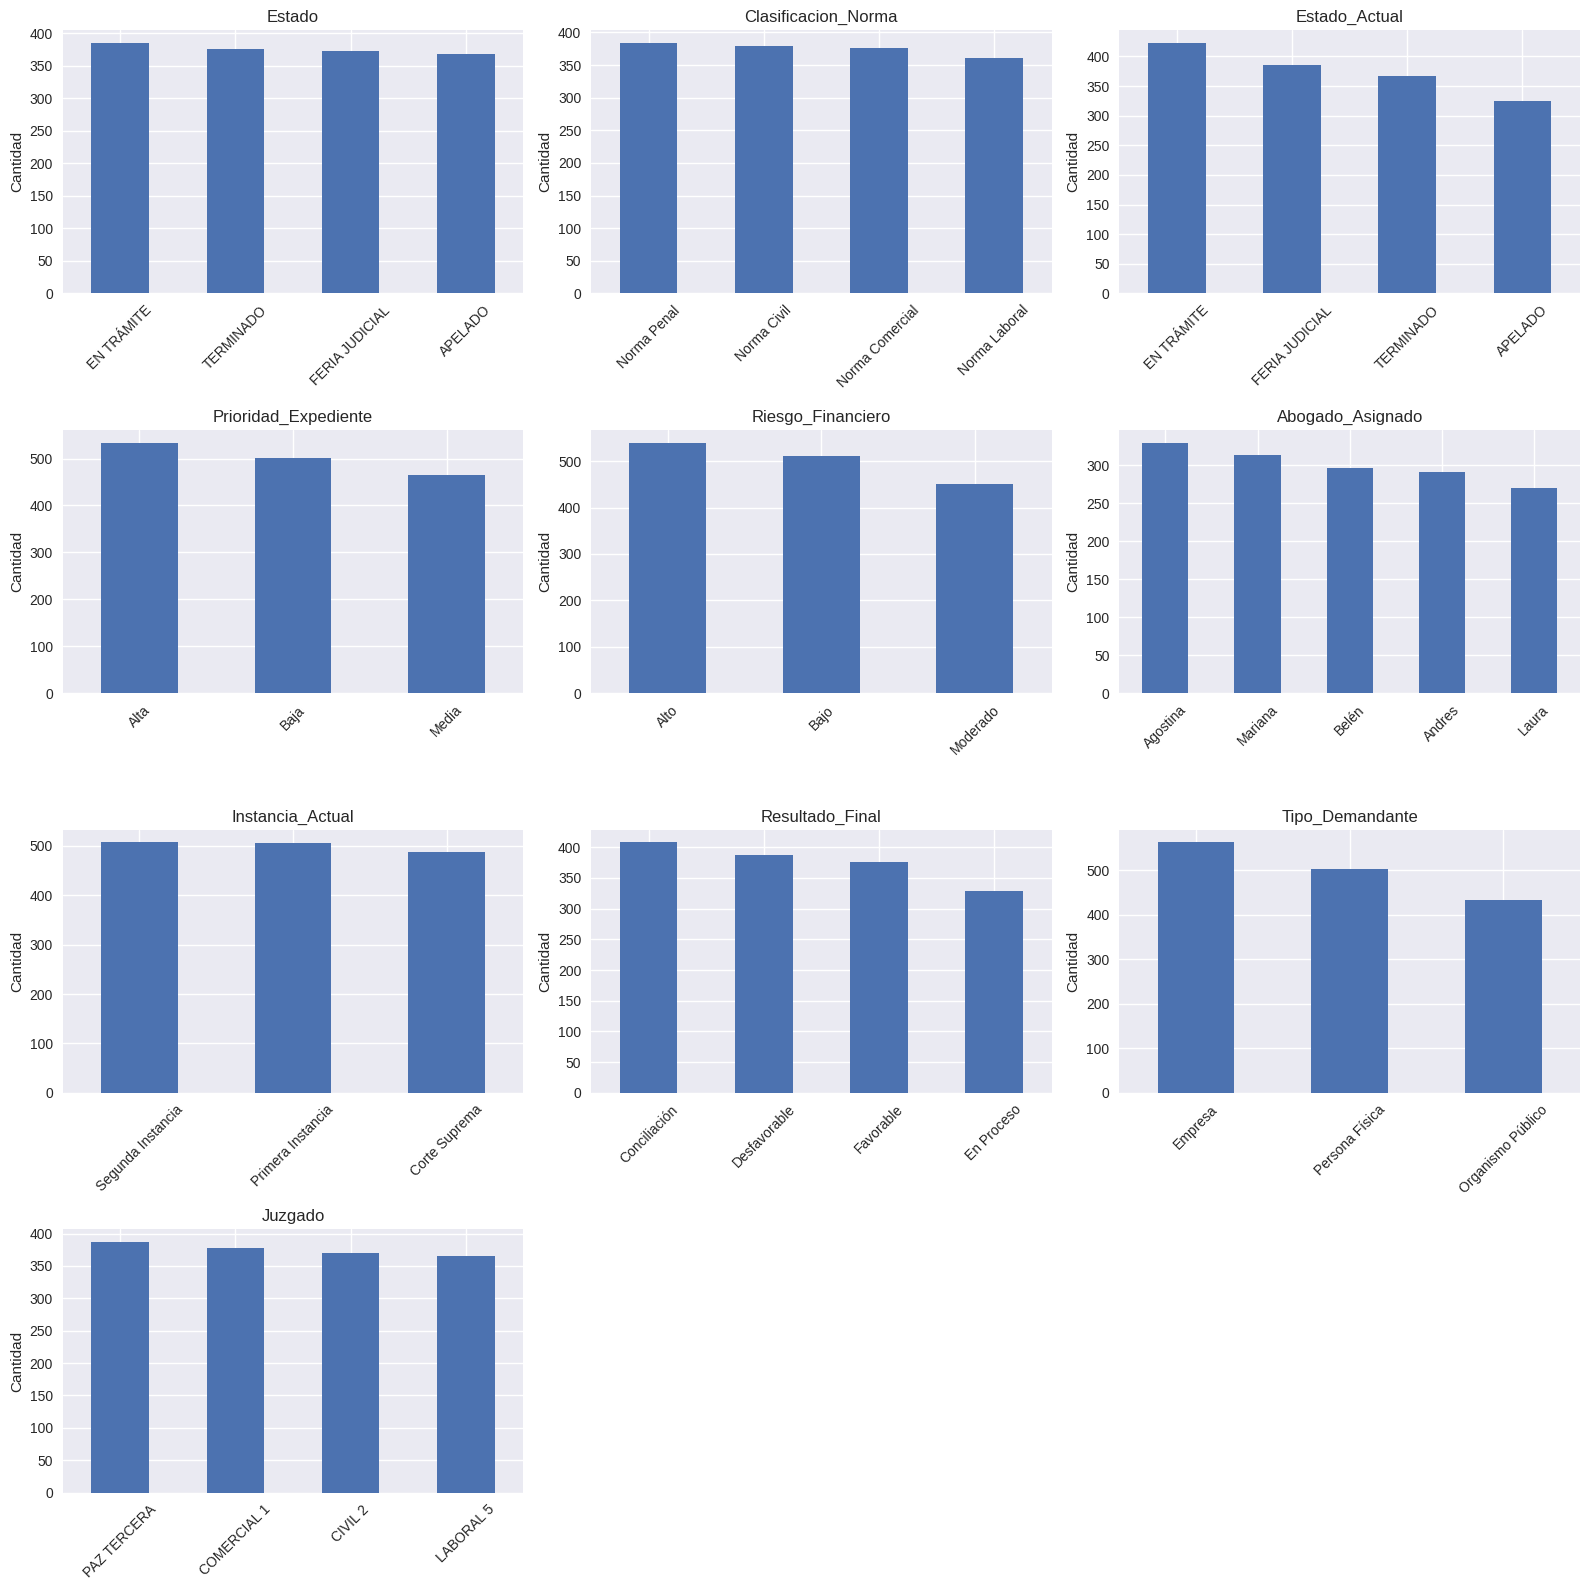

In [ ]:
# Seleccionamos las categóricas
cat_cols = [
    'Estado', 'Clasificacion_Norma', 'Estado_Actual', 'Prioridad_Expediente',
    'Riesgo_Financiero', 'Abogado_Asignado', 'Instancia_Actual',
    'Resultado_Final', 'Tipo_Demandante', 'Juzgado'
]


n = len(cat_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, 4*rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    df[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Cantidad')
    axes[i].tick_params(axis='x', rotation=45)

# borrar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


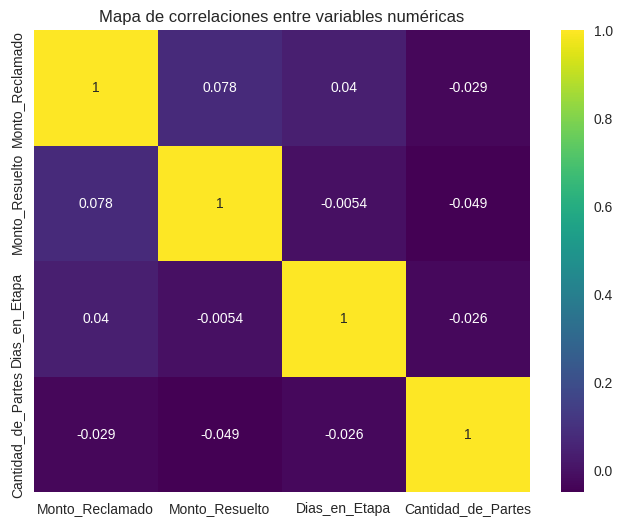

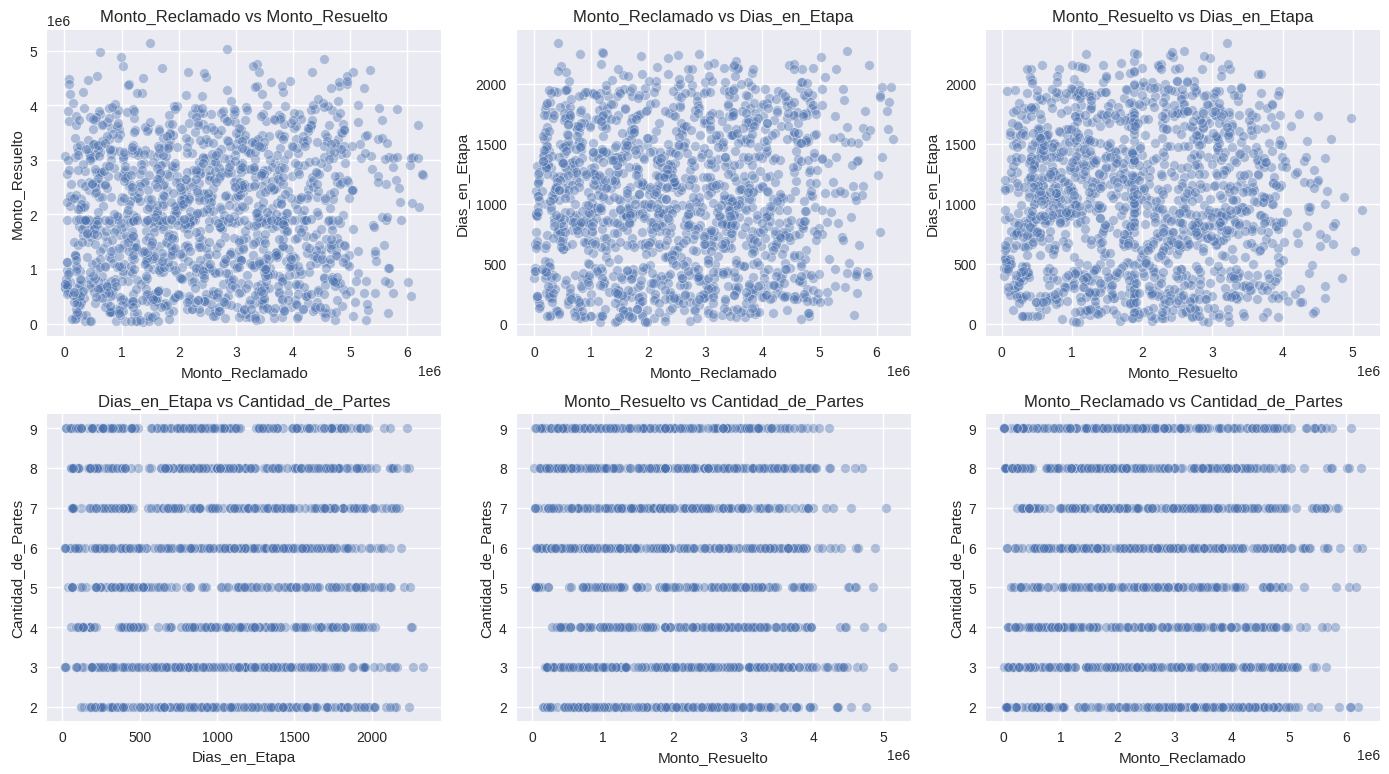

In [ ]:

#Análisis Bivariado
num_cols = ['Monto_Reclamado', 'Monto_Resuelto', 'Dias_en_Etapa', 'Cantidad_de_Partes']

# Matriz de correlaciones
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='viridis')
plt.title("Mapa de correlaciones entre variables numéricas")
plt.show()

#Scatterplots
fig, axes = plt.subplots(2, 3, figsize=(14,8))
axes = axes.flatten()

pairs = [
    ('Monto_Reclamado', 'Monto_Resuelto'),
    ('Monto_Reclamado', 'Dias_en_Etapa'),
    ('Monto_Resuelto', 'Dias_en_Etapa'),
    ('Dias_en_Etapa', 'Cantidad_de_Partes'),
    ('Monto_Resuelto', 'Cantidad_de_Partes'),
    ('Monto_Reclamado', 'Cantidad_de_Partes')
]

for ax, (x, y) in zip(axes, pairs):
    sns.scatterplot(data=df, x=x, y=y, alpha=0.4, ax=ax)
    ax.set_title(f"{x} vs {y}")

plt.tight_layout()
plt.show()

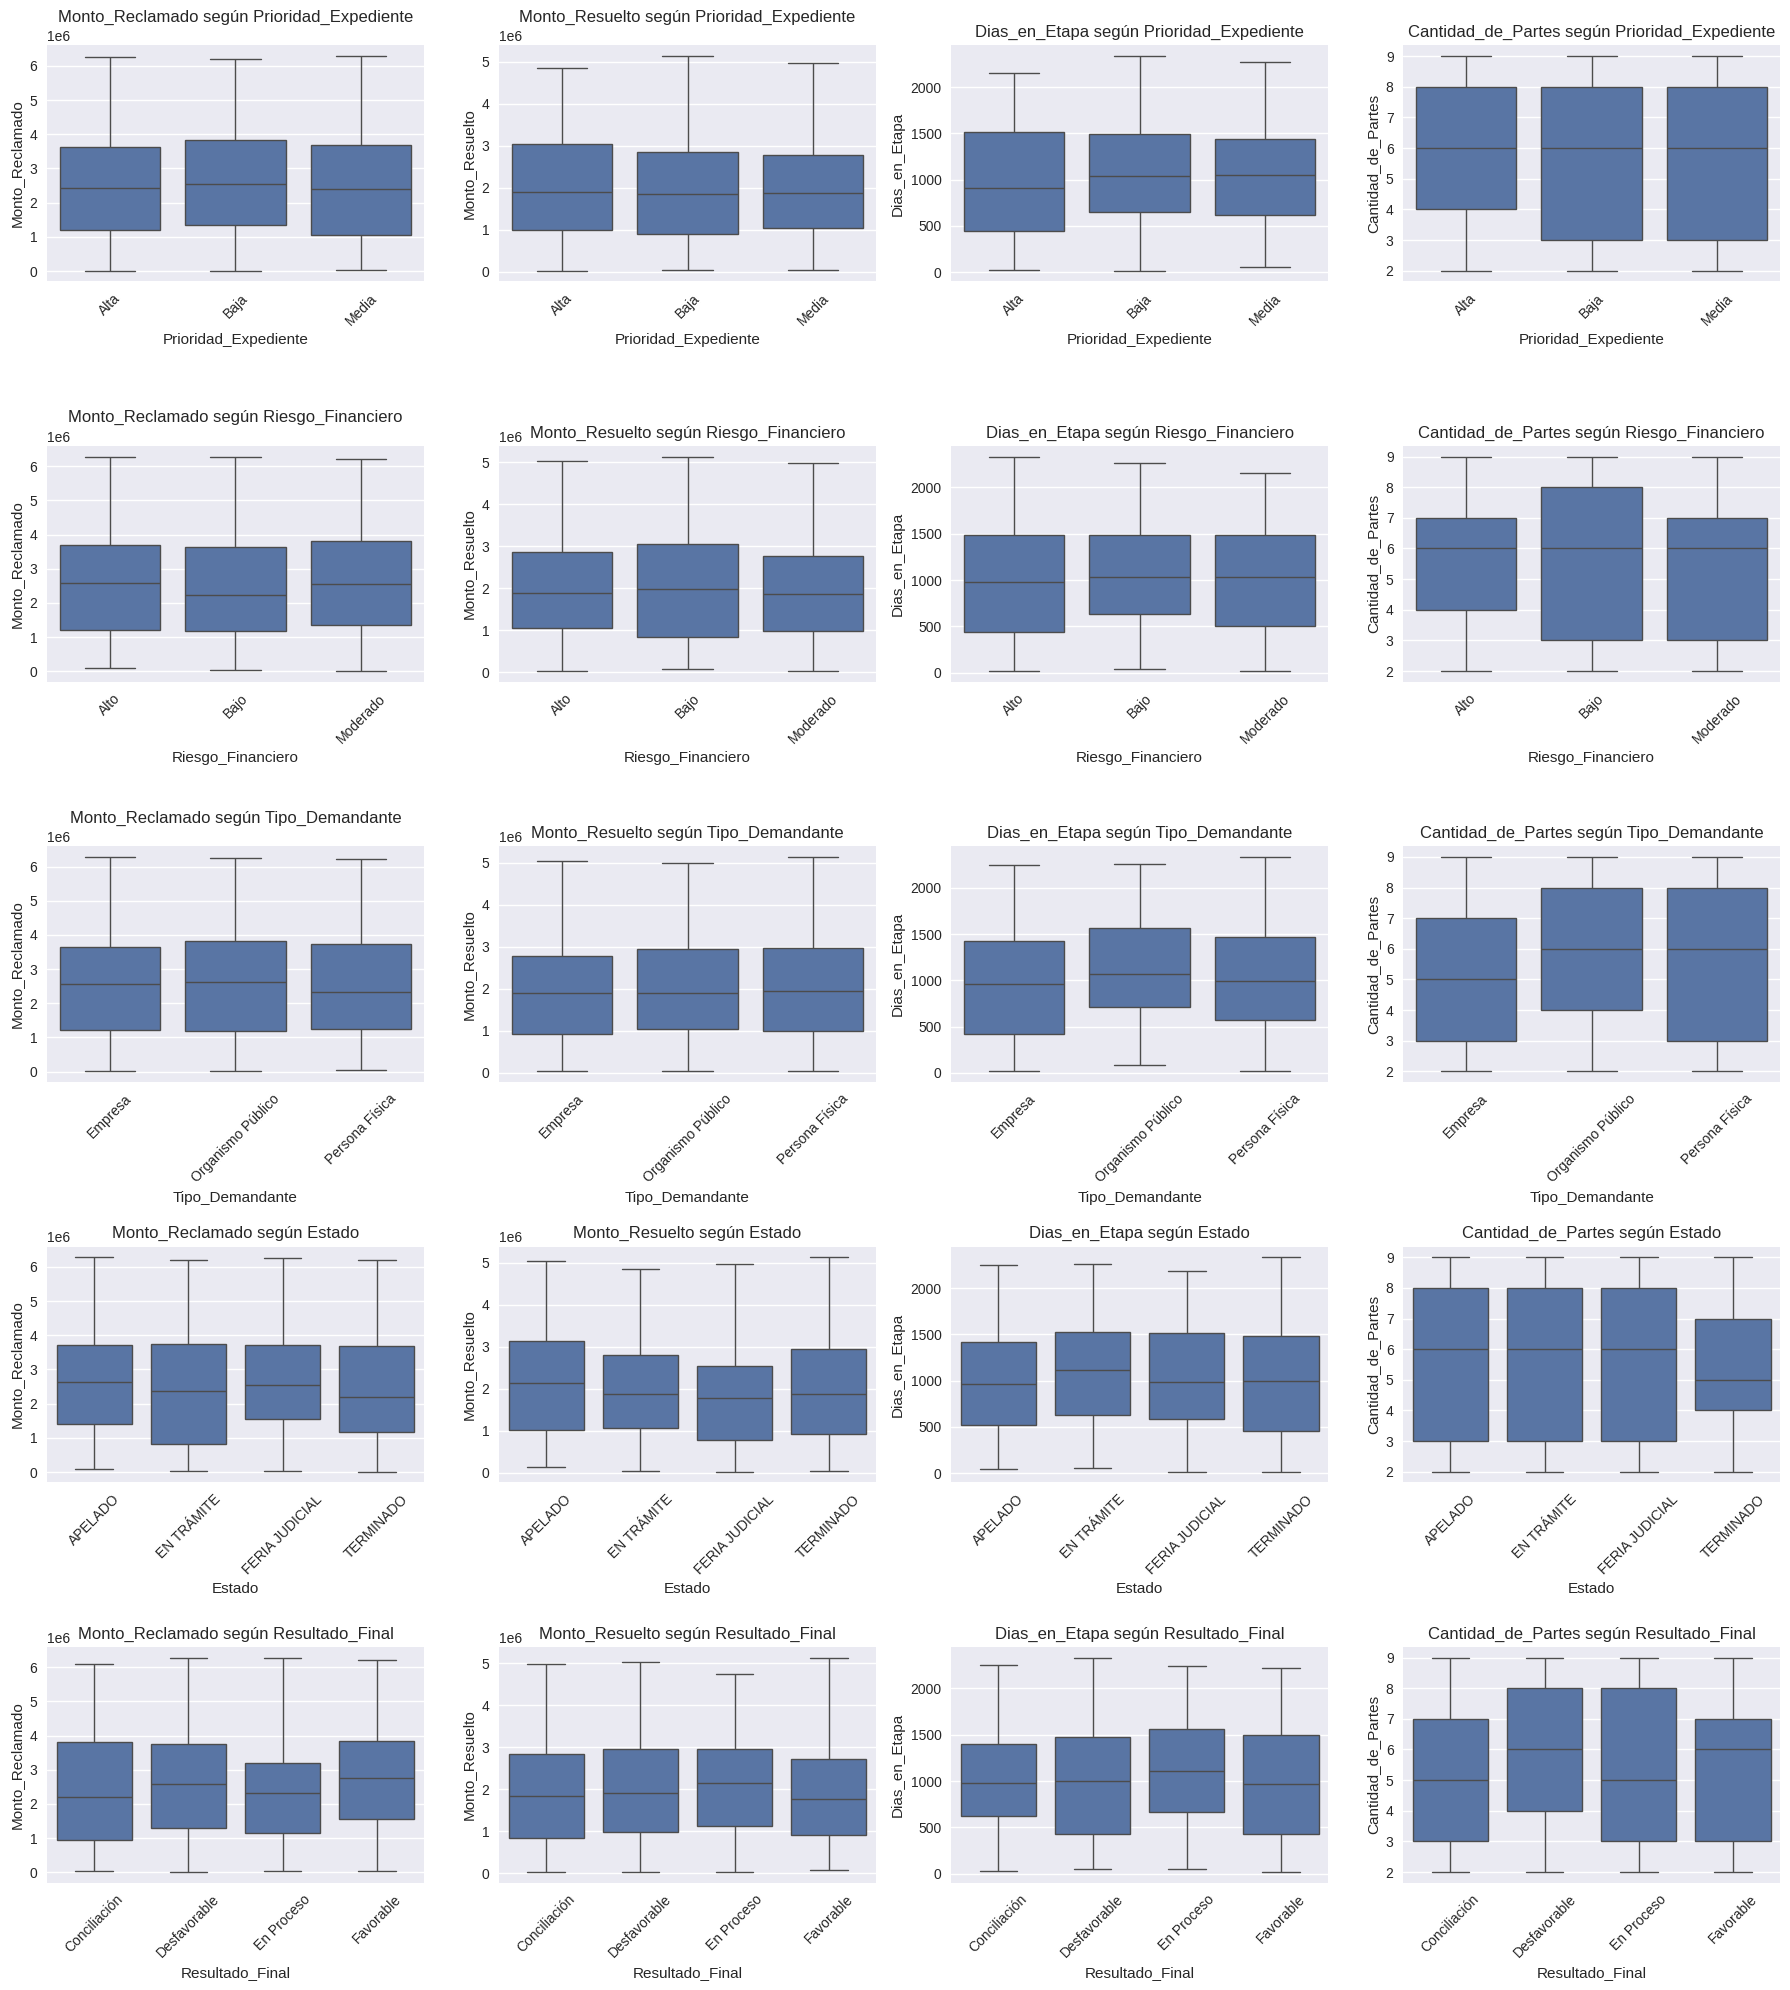

In [ ]:
# Columnas categóricas y numéricas que queremos comparar
categoricas = [
    "Prioridad_Expediente",
    "Riesgo_Financiero",
    "Tipo_Demandante",
    "Estado",
    "Resultado_Final"
]

numericas = [
    "Monto_Reclamado",
    "Monto_Resuelto",
    "Dias_en_Etapa",
    "Cantidad_de_Partes"
]


fig, axes = plt.subplots(len(categoricas), len(numericas), figsize=(18, 20))

for i, cat in enumerate(categoricas):
    for j, num in enumerate(numericas):
        sns.boxplot(
            data=df,
            x=cat,
            y=num,
            ax=axes[i, j]
        )
        axes[i, j].set_title(f"{num} según {cat}")
        axes[i, j].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
corr = df.select_dtypes(include="number").drop(columns="ID_Expediente").corr()
corr

,Cantidad_de_Partes,Monto_Reclamado,Monto_Resuelto,Dias_en_Etapa,Tiene_Audiencia
Cantidad_de_Partes,1.000000,-0.029149,-0.049287,-0.026441,0.015930
Monto_Reclamado,-0.029149,1.000000,0.077644,0.039507,-0.041309
Monto_Resuelto,-0.049287,0.077644,1.000000,-0.005422,-0.003666
Dias_en_Etapa,-0.026441,0.039507,-0.005422,1.000000,0.035709
Tiene_Audiencia,0.015930,-0.041309,-0.003666,0.035709,1.000000


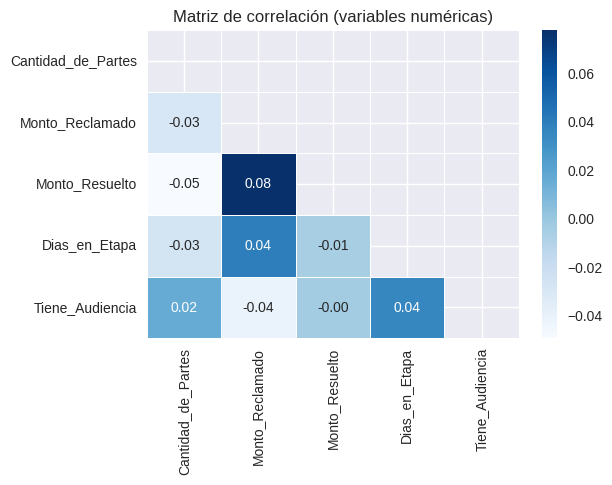

In [ ]:
plt.figure(figsize=(6,4))
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,
            annot=True,
            cmap="Blues",
            mask=mask,
            linewidths=0.5,
            fmt=".2f")

plt.title("Matriz de correlación (variables numéricas)")
plt.show()


#7.Exportar DataSet procesado para el modelo

In [ ]:
df.to_csv("Dataset_vialidad_limpio.csv", index=False)